# Viseklasna klasifikacija uz objedinjavanje jednocifrenih i dvocifrenih klasa u jednu

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import losses, optimizers

from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

from sklearn.decomposition import PCA

np.random.seed(10)

import category_encoders as ce

from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
# Ucitavanje podataka iz skupa sa imenima klasa
data = pd.read_csv('kddcup.csv.data_10_percent_corrected')

In [3]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
data.drop(columns = ['num_outbound_cmds', 'is_host_login'], axis = 1, inplace = True)

In [5]:
y = data['class']

In [19]:
y.loc[y == 'spy.'] = 'other_attacks.'

In [20]:
y.loc[y == 'perl.'] = 'other_attacks.'

In [21]:
y.loc[y == 'phf.'] = 'other_attacks.'

In [22]:
y.loc[y == 'multihop.'] = 'other_attacks.'

In [23]:
y.loc[y == 'ftp_write.'] = 'other_attacks.'

In [24]:
y.loc[y == 'loadmodule.'] = 'other_attacks.'

In [25]:
y.loc[y == 'rootkit.'] = 'other_attacks.'

In [26]:
y.loc[y == 'imap.'] = 'other_attacks.'

In [27]:
y.loc[y == 'warezmaster.'] = 'other_attacks.'

In [28]:
y.loc[y == 'land.'] = 'other_attacks.'

In [29]:
y.loc[y == 'buffer_overflow.'] = 'other_attacks.'

In [30]:
y.loc[y == 'guess_passwd.'] = 'other_attacks.'

In [31]:
len(np.where(y == 'other_attacks.')[0])

179

In [32]:
y = y.astype('category')

In [33]:
y = y.cat.codes

In [34]:
len(np.unique(y))

12

In [35]:
encoder = ce.BinaryEncoder(data, cols = ['protocol_type', 'service', 'flag'])
X = encoder.fit_transform(data)

In [36]:
X = X.drop(columns = ['class'])

In [37]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, stratify=y, random_state=7)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [38]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
model = Sequential()
model.add(Dense(units=150, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=12, activation='softmax'))

In [40]:
model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [41]:
batch_size = 128
epochs = 30

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/30
330994/330994 [==============================] - 39s 117us/step - loss: 0.1887 - accuracy: 0.9728
Epoch 2/30
330994/330994 [==============================] - 36s 110us/step - loss: 0.0119 - accuracy: 0.9976
Epoch 3/30
330994/330994 [==============================] - 36s 107us/step - loss: 0.0070 - accuracy: 0.9986
Epoch 4/30
330994/330994 [==============================] - 39s 116us/step - loss: 0.0053 - accuracy: 0.9990
Epoch 5/30
330994/330994 [==============================] - 40s 120us/step - loss: 0.0046 - accuracy: 0.9991
Epoch 6/30
330994/330994 [==============================] - 40s 120us/step - loss: 0.0040 - accuracy: 0.9992
Epoch 7/30
330994/330994 [==============================] - 40s 121us/step - loss: 0.0035 - accuracy: 0.9993
Epoch 8/30
330994/330994 [==============================] - 41s 123us/step - loss: 0.0033 - accuracy: 0.9993
Epoch 9/30
330994/330994 [==============================] - 39s 118us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 10/30
330994/

In [42]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

163027/163027 [==============================] - 22s 133us/step
Test loss: 0.002114586556730759
Test accuracy: 0.9994908571243286


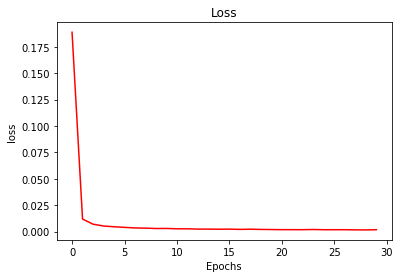

In [43]:
epochs = history.epoch

loss = history.history['loss']

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red')
plt.show()

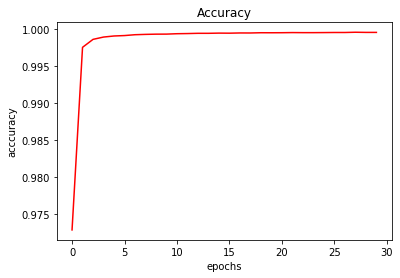

In [44]:
acc = history.history['accuracy']

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acccuracy')
plt.plot(epochs, acc, c='red')
plt.show()

In [45]:
y_predicted = model.predict(X_test)
y_predicted_classes = np.argmax(y_predicted, axis = 1)

In [46]:
y_test_classes = np.argmax(y_test, axis = 1)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
print(confusion_matrix(y_test_classes, y_predicted_classes))

[[  726     0     0     0     1     0     0     0     0     0     0     0]
 [    0   407     0     2     2     0     0     0     1     0     0     0]
 [    0     0 35376     0     0     0     0     0     0     0     0     0]
 [    0     1     0    72     1     0     0     0     2     0     0     0]
 [    2     6     2     0 32071     0     1     1     3     1     0    15]
 [    0     0     1     0    10    47     0     0     0     0     0     1]
 [    0     0     0     0     0     0    87     0     0     0     0     0]
 [    0     0     0     0     1     0     0   341     1     0     0     0]
 [    0     0     0     2     6     0     0     2   514     0     0     0]
 [    0     0     0     0     0     0     0     0     0 92661     0     0]
 [    0     0     0     0     0     0     0     0     0     0   323     0]
 [    0     0     0     0    18     0     0     0     0     0     0   319]]


In [49]:
print(classification_report(y_test_classes, y_predicted_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       727
           1       0.98      0.99      0.99       412
           2       1.00      1.00      1.00     35376
           3       0.95      0.95      0.95        76
           4       1.00      1.00      1.00     32102
           5       1.00      0.80      0.89        59
           6       0.99      1.00      0.99        87
           7       0.99      0.99      0.99       343
           8       0.99      0.98      0.98       524
           9       1.00      1.00      1.00     92661
          10       1.00      1.00      1.00       323
          11       0.95      0.95      0.95       337

    accuracy                           1.00    163027
   macro avg       0.99      0.97      0.98    163027
weighted avg       1.00      1.00      1.00    163027

